## Clustering jerarquico
### Andrea Julieth Sosa Rodriguez, Tomas Barrios Guevara, Daniel Santiago Riveros Rodriguez

#### **Si tenemos muchos datos y no sabemos a qué grupo pertenecen, ¿cómo los organizamos de manera lógica?** 

Para esto existe el Clustering Jerárquico, una técnica de aprendizaje no supervisado que:

- Agrupa los datos en un árbol de clústeres anidados.

- Permite visualizar relaciones y similitudes entre los datos.

- Nos ayuda a descubrir patrones ocultos en conjuntos grandes de información.

- Agrupa los datos sin imponer un orden lineal dentro de estos.

En otras palabras, el clustering jerárquico es una forma de clasificar sin etiquetas previas, construyendo estructuras que revelan cómo se conectan los datos entre sí.



### Métodos de Clustering Jerárquico

Existen dos enfoques principales en el clustering jerárquico:

🔹 **Aglomerativo (Ascendente / Bottom-Up)**

- Cada dato inicia como un clúster independiente.

- Luego, en cada iteración, se busca el par de clústeres más cercanos (según una métrica de distancia) y se fusionan en un único grupo.

- El proceso continúa hasta que todos los datos quedan en un solo clúster que los contiene a todos.

- Es el método más usado en la práctica, ya que está implementado en librerías como scipy y scikit-learn.

**Ejemplo**
Imagina que tienes muchas piezas de un rompecabezas. Al inicio están todas separadas. En cada paso unes las piezas que encajan mejor, hasta que al final tienes la imagen completa.

**Ventajas ✅**

Sencillo de entender e implementar.

Produce un dendrograma fácil de interpretar.

**Desventajas ❌**

Puede ser costoso en tiempo computacional si hay demasiados datos.

🔹 **Divisivo (Descendente / Top-Down)**

- A diferencia del aglomerativo, este comienza con todos los datos en un único clúster grande.

- En cada paso, se divide ese grupo en subgrupos más pequeños, hasta que cada dato queda separado en su propio clúster.

- Es menos utilizado porque requiere técnicas más complejas para decidir cómo dividir los grupos.

**Ejemplo**
Imagina que ya tienes el rompecabezas armado. En cada paso lo vas separando en secciones más pequeñas, hasta que cada pieza está por separado.

**Ventajas ✅**

Puede ser más eficiente en ciertos contextos, cuando es más fácil detectar grandes diferencias primero.

**Desventajas ❌**

Es más difícil de implementar.

No está tan disponible en librerías estándar.



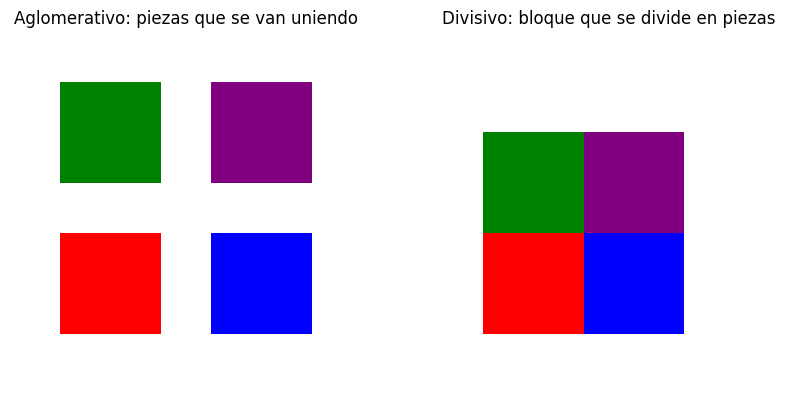

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_puzzle(ax, mode="aglomerativo"):
    # Colores y posiciones de las piezas
    colors = ["red", "blue", "green", "purple"]
    positions = [(0, 0), (1, 0), (0, 1), (1, 1)]
    
    if mode == "aglomerativo":
        # Piezas separadas
        for (x, y), c in zip(positions, colors):
            ax.add_patch(patches.Rectangle((x*1.5, y*1.5), 1, 1, facecolor=c))
        ax.set_title("Aglomerativo: piezas que se van uniendo")
    else:
        # Piezas juntas en bloque
        idx = 0
        for (x, y) in positions:
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=colors[idx]))
            idx += 1
        ax.set_title("Divisivo: bloque que se divide en piezas")
    
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect("equal")
    ax.axis("off")

# Crear figura con las dos versiones
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

draw_puzzle(axes[0], "aglomerativo")
draw_puzzle(axes[1], "divisivo")

plt.show()


## Visualización con Dendrograma

Un dendrograma es la representación gráfica en forma de árbol que muestra:

- El orden en que se fusionan o dividen los clústeres.

- La distancia o similitud entre los datos.

**Un dendrograma también se puede entender como una lista anidada de listas con distintos atributos**

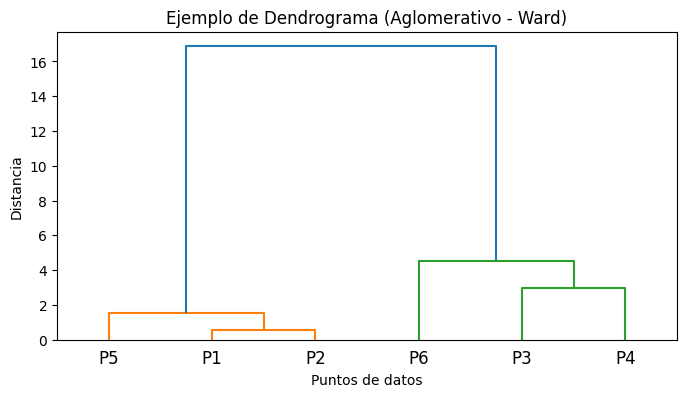

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

# Clustering jerárquico aglomerativo con el método 'ward'
Z = linkage(X, method='ward')

# Graficar dendrograma
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Ejemplo de Dendrograma (Aglomerativo - Ward)")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()




## Cómo interpretar un dendrograma?

Elementos principales

- Eje X → Los datos u observaciones (por ejemplo: P1, P2, P3…).

- Eje Y → La distancia o disimilitud entre los clústeres cuando se unen.

- Ramas → Cada línea horizontal representa la unión de dos clústeres.

- Altura de la unión → Cuanto más arriba ocurre la unión, menos similares son los grupos que se juntan.


### interpretación del ejemplo

- P1 y P2 se asemejan más entre ellos que con el resto → se unen en una rama a baja altura.

- P3 y P4 también forman un clúster propio, pero a una altura un poco mayor → lo que significa que son menos parecidos entre sí que P1 y P2.

- P5 se une después con P1 y P2 → indicando que está más cerca de ese grupo que de P3 y P4.

- P6 queda aislado hasta el final y se une a gran altura → lo que indica que es el dato más diferente de todos.

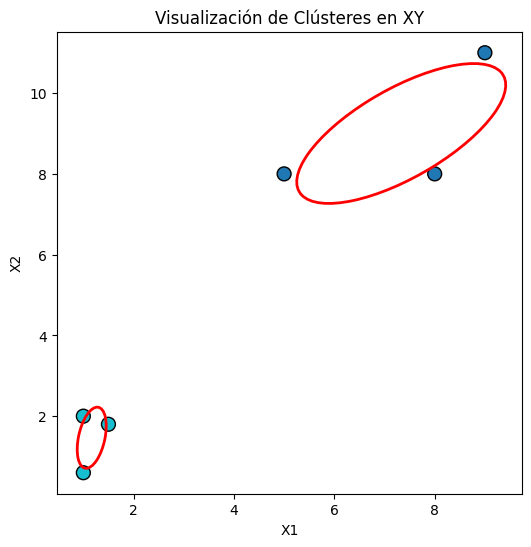

In [3]:
# --- Subplot 2: Visualización en XY con óvalos ---
from sklearn.cluster import AgglomerativeClustering
from matplotlib.patches import Ellipse
import numpy as np

cluster_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = cluster_model.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=100, edgecolor="k")

# Dibujar óvalos alrededor de cada clúster
for cluster_id in np.unique(labels):
    cluster_points = X[labels == cluster_id]
    mean = cluster_points.mean(axis=0)
    cov = np.cov(cluster_points, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='red', facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

plt.title("Visualización de Clústeres en XY")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


### Cómo funcionan los algoritmos de clustering jerarquico?

Los algoritmos de clustering jerarquico usan lo que es la **matriz de disimilitud** , para decidir si fusionar o dividir los clústeres del grupo de datos, esta matriz tiene dos características importantes:

- Distancia entre dos puntos ( euclidiana )
- Criterio de vinculación o ligamento de clúster


El **método de vinculación** define cómo se mide la distancia entre clústeres en cada paso de la fusión, es importante aclarar que:

- El número de clústers puede variar dependiendo del metodo de vinculación elegido en un mismo conjunto de datos.

- La elección del método de vinculación más apropiado está condicionada por aspectos como la naturaleza de los datos, su densidad, la geometría de los clústeres y la presencia de valores atípicos o ruido en el conjunto.
A continuación, exploramos los métodos más comunes, con ejemplos visuales usando el mismo conjunto de datos.






### 1️. Enlace simple (Single Linkage / mínimo)

- Calcula la distancia entre dos clústeres como la **distancia mínima** entre cualquier par de puntos.  
- Tiende a manejar bien formas de clúster no elípticas, pero sufre el **efecto de encadenamiento**.  

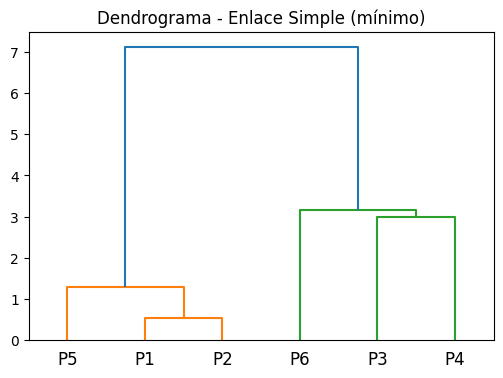

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],[1.5, 1.8],[5, 8],[8, 8],[1, 0.6],[9, 11]])

# Enlace simple
Z_single = linkage(X, method='single')

plt.figure(figsize=(6,4))
dendrogram(Z_single, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Dendrograma - Enlace Simple (mínimo)")
plt.show()

### 2. Enlace completo (Complete Linkage / máximo)

- La distancia entre clústeres se calcula como la distancia máxima entre sus puntos.

- Menos sensible al ruido que el simple, pero tiende a generar clústeres más compactos y esféricos.

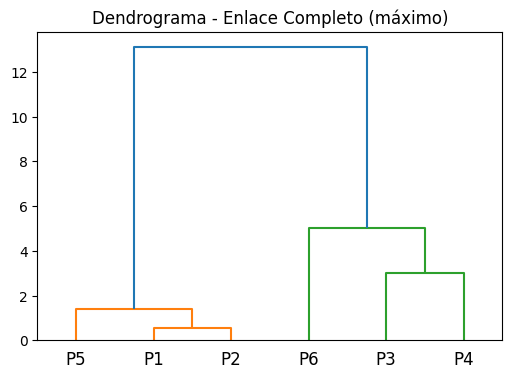

In [5]:
Z_complete = linkage(X, method='complete')

plt.figure(figsize=(6,4))
dendrogram(Z_complete, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Dendrograma - Enlace Completo (máximo)")
plt.show()


### Comparación mínimo y máximo

Enlace máximo:

- Da prioridad a la distancia más lejana → mantiene clústeres compactos y bien separados.

- El último clúster aparece a mayor altura → indica grupos más definidos.

Enlace mínimo:

- Da prioridad a la distancia más corta → une clústeres antes aunque tengan puntos muy alejados.

- El último clúster aparece a menor altura → da la impresión de un único grupo conectado por “cadenas”.

### 3. Método de Ward (Varianza mínima)

- Minimiza el aumento en la suma de cuadrados al fusionar clústeres.

- Produce clústeres compactos y esféricos.

- Es muy usado en la práctica y menos sensible al ruido.

- El método de Ward es una buena opción para variables cuantitativas

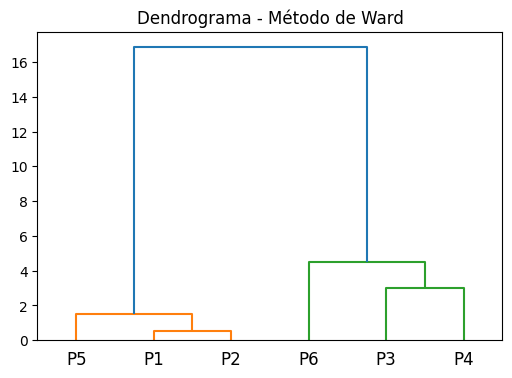

In [6]:
Z_ward = linkage(X, method='ward')

plt.figure(figsize=(6,4))
dendrogram(Z_ward, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Dendrograma - Método de Ward")
plt.show()


### 4. Plot comparativo entre los 3 métodos de vinculación más importantes

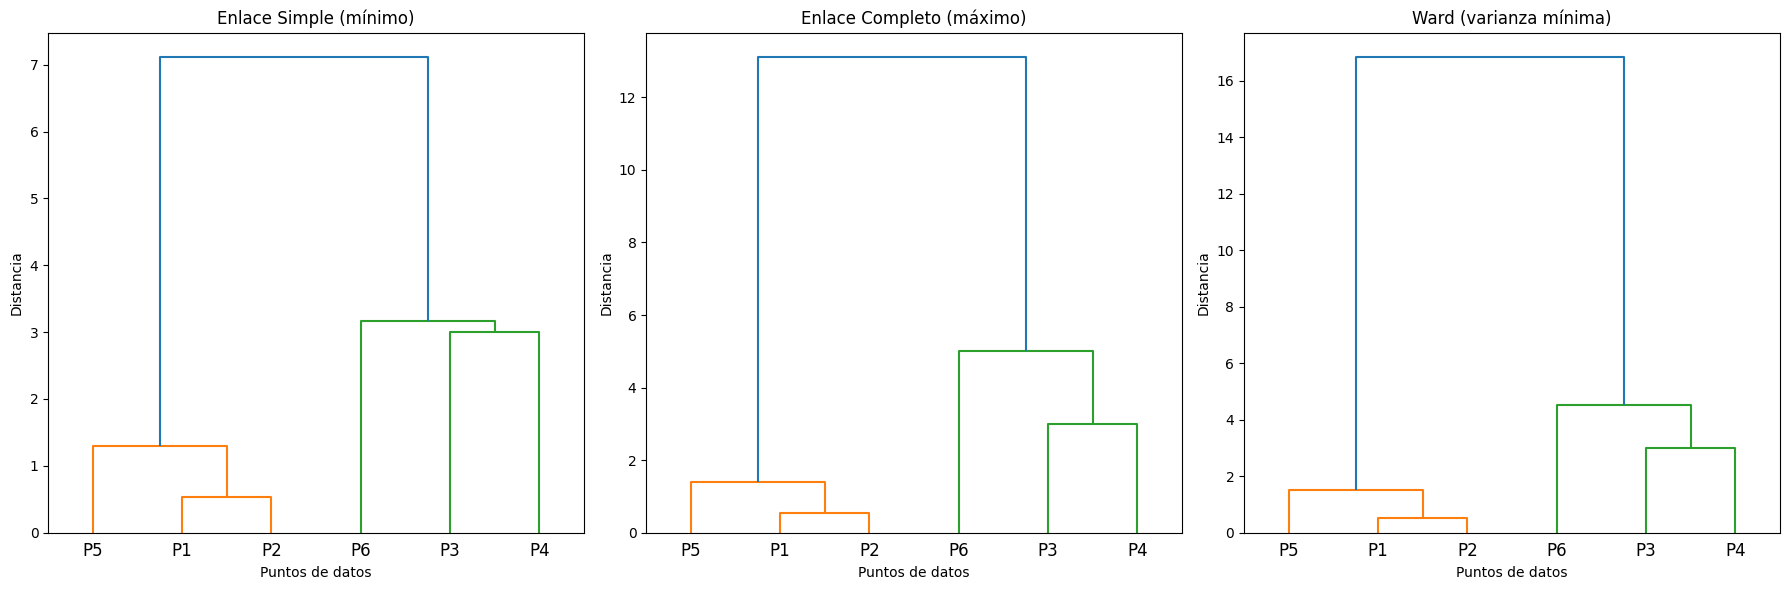

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

# Métodos de vinculación
methods = ["single", "complete", "ward"]
titles = ["Enlace Simple (mínimo)", "Enlace Completo (máximo)", "Ward (varianza mínima)"]

# Crear figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, method, title in zip(axes, methods, titles):
    Z = linkage(X, method=method)
    dendrogram(Z, labels=[f"P{i}" for i in range(1, len(X)+1)], ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Puntos de datos")
    ax.set_ylabel("Distancia")

plt.tight_layout()
plt.show()


##  5. Interpretación comparativa de P6, P3 y P4 en los distintos métodos

Veamos cómo se agrupan los puntos `P6`, `P3` y `P4` dependiendo del criterio de vinculación:

---

### Enlace Simple (mínimo)
- `P3` y `P4` se unen rápidamente porque están **muy cercanos entre sí**.  
- `P6` se une con este clúster relativamente pronto, ya que basta con que **un solo punto** (P4) esté más cerca de él.  
-  Esto refleja el **efecto de encadenamiento**: aunque `P6` está más lejos de `P3`, termina unido al grupo {P3, P4} muy pronto.

---

### Enlace Completo (máximo)
- De nuevo, `P3` y `P4` forman el primer clúster porque son **muy similares**.  
- `P6` se une más tarde, cuando la **máxima distancia** con respecto a {P3, P4} todavía es razonable.  
- Aquí los grupos se mantienen **más compactos y separados**: `P6` no se mezcla demasiado rápido, solo cuando hay suficiente cohesión en el grupo.

---

###  Ward (varianza mínima)
- `P3` y `P4` también se agrupan primero.  
- `P6` se une después, pero de manera más **balanceada**, minimizando el incremento en la suma de cuadrados.  
-  El resultado es un clúster {P3, P4, P6} que es **más estable y equilibrado** en comparación con el enlace simple o completo.

## Ejemplo de aplicación clúster

In [31]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True


In [32]:
path = "ReporteContaminante_08012022_8am.csv"  # mismo folder del notebook
df = pd.read_csv(path, encoding="utf-8")

label_col = "Estaciones"            # nombres de estaciones (texto)
num_cols  = [c for c in df.columns if c != label_col] 

print(df.shape)
df.head(10)


(15, 6)


,Estaciones,CO,NO,NO2,OZONO,PM2.5
0,Bolivia,0.48390,23.273,21.217,2.772,7.8
1,Carvajal Sevillana,1.19106,50.137,19.076,5.134,26.0
2,Centro de Alto Rendimiento,0.73018,37.082,12.330,2.219,22.0
3,Colina,0.50250,16.631,15.367,1.728,3.9
4,Fontibon,0.90755,42.237,21.646,6.488,20.9
5,Guaymaral,0.10093,5.915,3.268,13.448,6.0
6,Kennedy,1.40230,60.127,28.417,8.247,17.0
7,Las Ferias,0.78732,20.681,11.314,8.834,19.0
8,MinAmbiente,1.24005,39.562,17.770,2.858,8.0
9,Movil Fontibon,1.22863,47.189,22.375,3.824,21.6


Acá primero vamos a ver cuales son las variables que vamos a tratar (en este caso mediciones de contaminación del aire)

### 2. Definición del estandarizador  
`StandardScaler()` construye un objeto que **resta la media y divide por la desviación estándar** de cada columna:

$z = \frac{x - \mu}{\sigma}$


Tras la transformación, **cada característica** queda con **media 0** y **desviación estándar 1**.

### 3. Ajuste y transformación en un solo paso  


In [33]:
X_num = df[num_cols].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X_num.values)


### 4. Aplicar la clusterización Jerárquica  
Este bloque ejecuta un **clustering jerárquico aglomerativo** usando diferentes métodos de enlace y grafica los **dendrogramas** correspondientes. La idea es comparar cómo cambian las agrupaciones dependiendo de la forma en que se mide la distancia entre clusters.

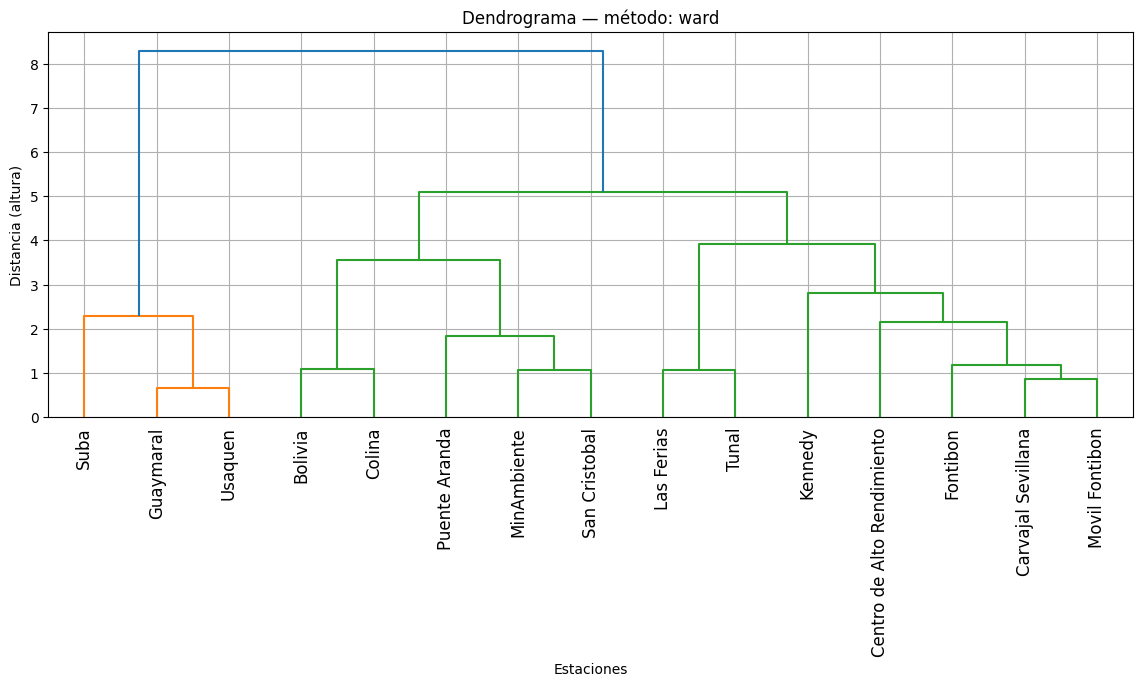

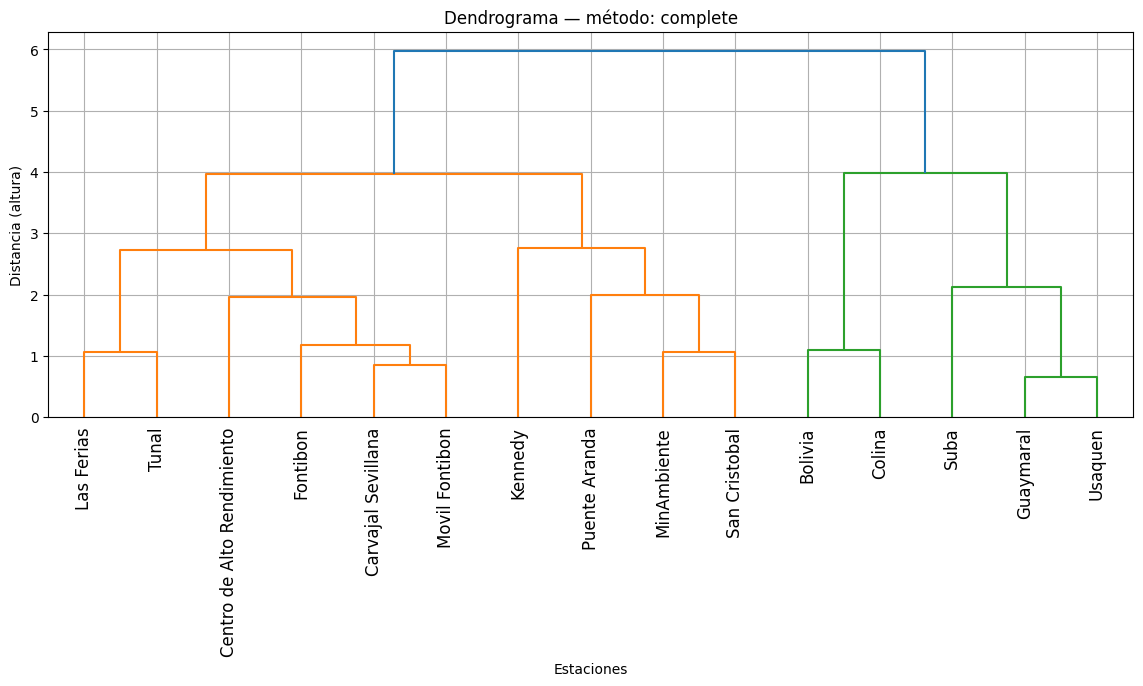

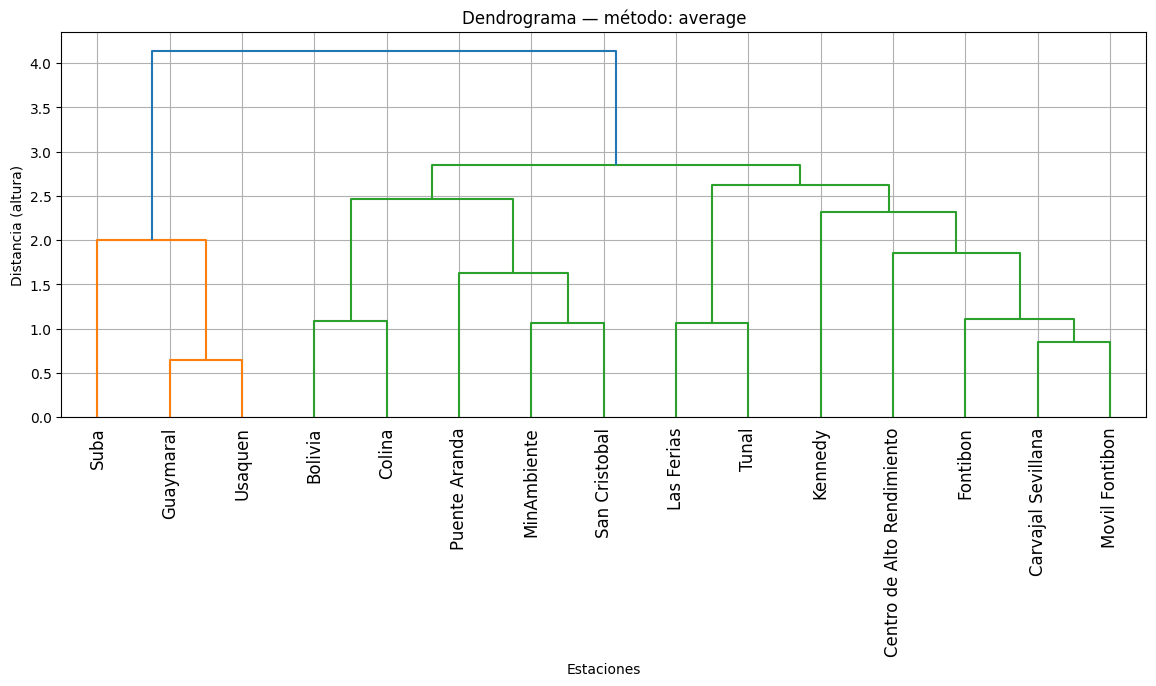

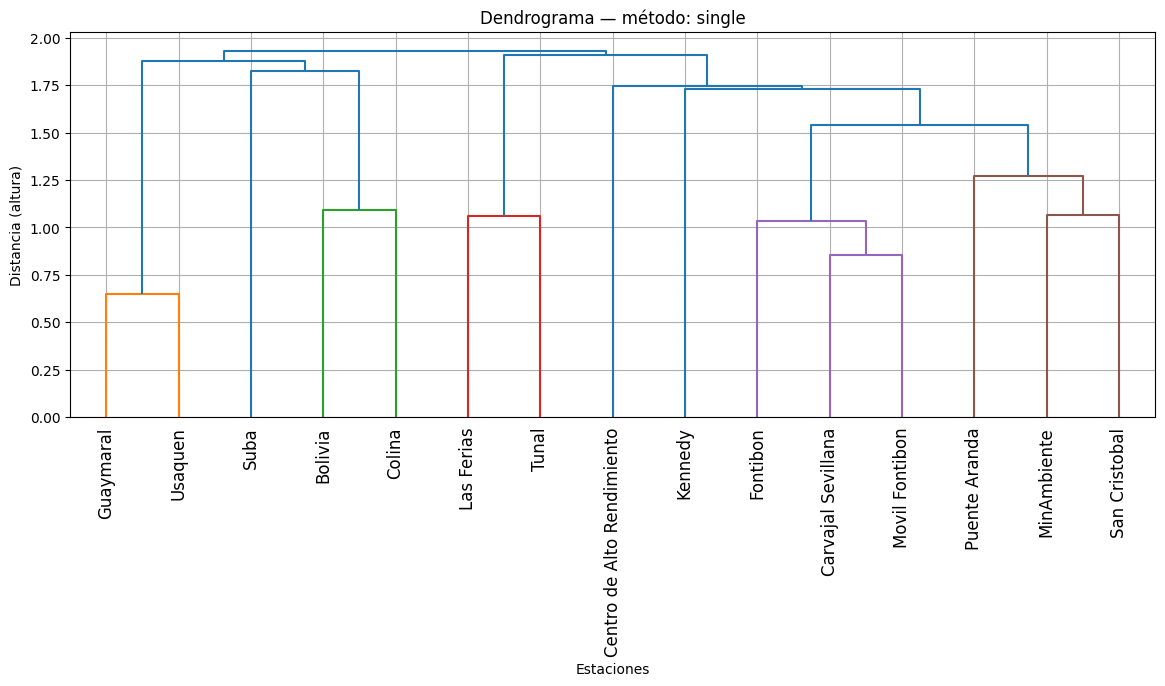

In [ ]:
methods = ["ward", "complete", "average", "single"]
Z_dict = {} #Crear matriz de fusiones jerárquicas para cada método, almacena los resultados de cada método Z
for m in methods:
    Z = linkage(X, method=m)    # Aplica clustering jerárquico sobre los datos estandarizados X, segun el metodo correspondiente
    Z_dict[m] = Z #Guarda el resultado
    plt.figure(figsize=(14,5))
    dendrogram(Z, labels=df[label_col].values, leaf_rotation=90)
    plt.title(f"Dendrograma — método: {m}")
    plt.xlabel("Estaciones"); plt.ylabel("Distancia (altura)")
    plt.show()


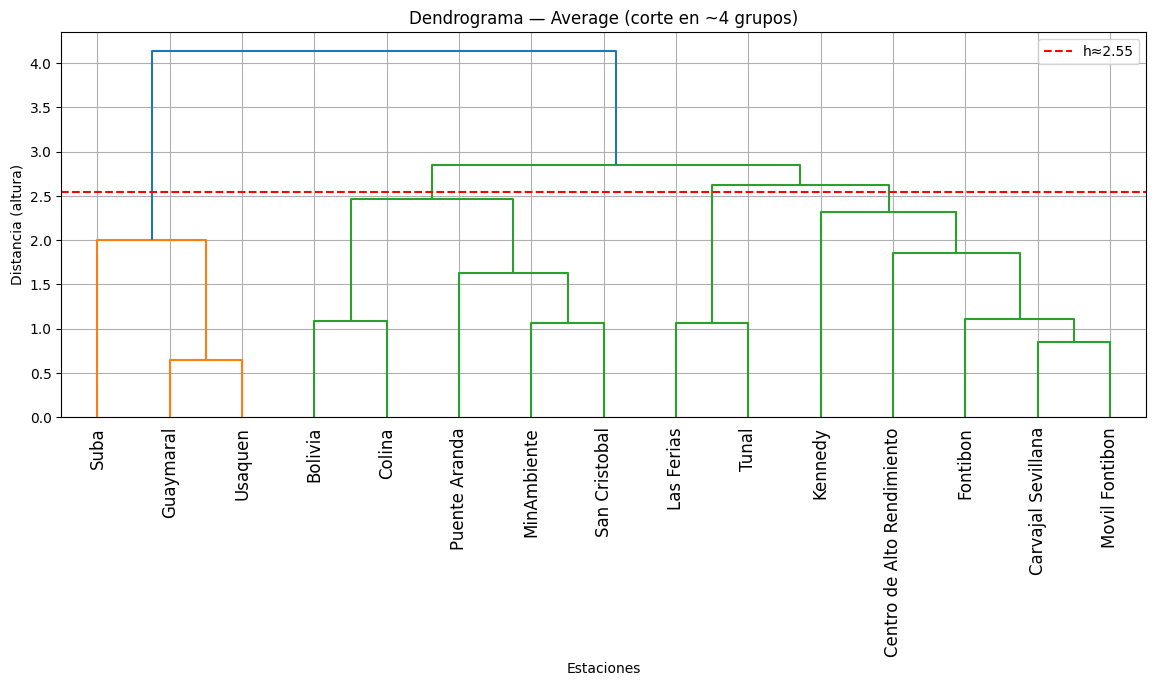

,Estaciones,cluster_avg4
5,Guaymaral,1
12,Suba,1
14,Usaquen,1
0,Bolivia,2
3,Colina,2
8,MinAmbiente,2
10,Puente Aranda,2
11,San Cristobal,2
7,Las Ferias,3
13,Tunal,3


In [ ]:
m = "average" #Vamos a tomar el dendograma de 'average' para definir grupos
Z = Z_dict[m] #Recuperamos la matriz de fusiones jerárquicas

# Asignaciones con k=4
labels_hc4 = fcluster(Z, t=4, criterion="maxclust")

# Umbral (altura) aproximado que separa en 4 clusters:
# tomamos el promedio entre las últimas fusiones que llevan de 5->4 y 4->3
heights = Z[:, 2]
h_4 = (heights[-4] + heights[-3]) / 2  if len(heights) >= 4 else heights.max()

plt.figure(figsize=(14,5))
dendrogram(Z, labels=df[label_col].values, leaf_rotation=90)
plt.axhline(h_4, color="red", linestyle="--", label=f"h≈{h_4:.2f}")
plt.title("Dendrograma — Average (corte en ~4 grupos)")
plt.xlabel("Estaciones"); plt.ylabel("Distancia (altura)")
plt.legend(); plt.show()

# Mostrar grupos
df_hc4 = df[[label_col]].copy()
df_hc4["cluster_avg4"] = labels_hc4
df_hc4.sort_values(["cluster_avg4", label_col])


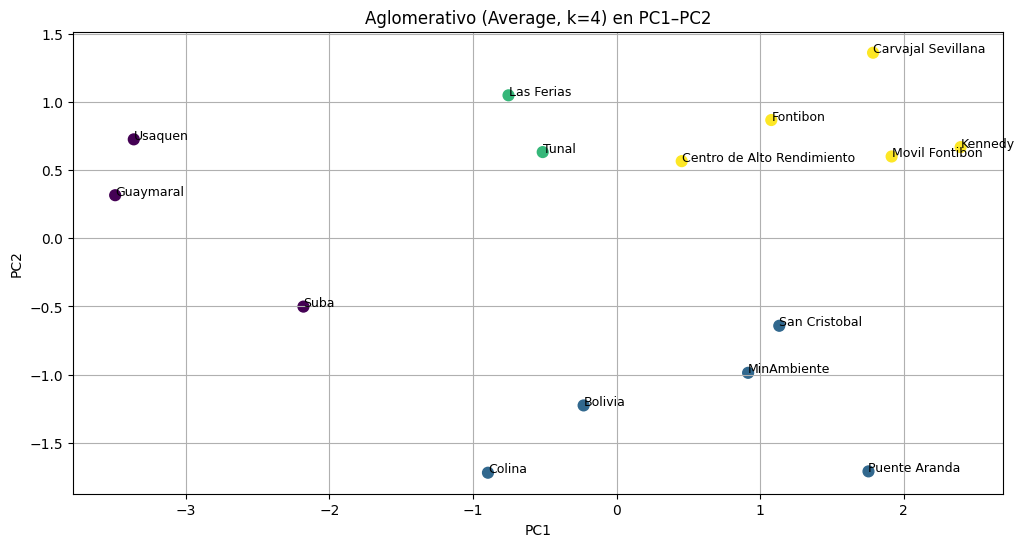

In [24]:
plt.figure()
plt.scatter(scores["PC1"], scores["PC2"], c=labels_hc4, s=60)
for i, name in enumerate(df[label_col].values):
    plt.annotate(str(name), (scores["PC1"].iloc[i], scores["PC2"].iloc[i]), fontsize=9)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("Aglomerativo (Average, k=4) en PC1–PC2")
plt.show()


## Conclusiones del Ejemplo de Aplicación

### 1. Agrupamiento de estaciones
Después de estandarizar los datos y aplicar **clustering jerárquico aglomerativo** con enlace *average*, el corte del dendrograma en **k = 4** formó los siguientes grupos:

- **Clúster 1:** Guaymaral, Suba, Usaquén  
- **Clúster 2:** Bolivia, Colina, MinAmbiente, Puente Aranda, San Cristóbal  
- **Clúster 3:** Las Ferias, Tunal  
- **Clúster 4:** Carvajal Sevillana, Centro de Alto Rendimiento, Fontibón, Kennedy, Móvil Fontibón

### 2. Coherencia de los resultados
La separación en cuatro clústeres resultó **coherente**: las estaciones dentro de cada grupo presentaron **perfiles de contaminación similares**, lo que confirma la capacidad del método para detectar patrones en los datos.

### 3. Visualización en componentes principales
La proyección en el plano **PC1–PC2** permitió observar que los clústeres definidos se mantienen separados de manera clara, reforzando la validez de la agrupación realizada.

---

## Conclusiones Generales

### 1. Motivos de uso
El método de clustering jerárquico fue adecuado en este trabajo porque:
- Funciona bien en **datasets pequeños o medianos**, como el de 15 estaciones utilizado.  
- Permite interpretar los resultados de manera visual a través de **dendrogramas**.  
- No requiere fijar el número de clústeres de antemano, ya que el dendrograma muestra todas las posibles particiones y luego se decide el corte.

### 2. Ventajas y limitaciones
- **Ventajas:** simplicidad conceptual, visualización clara, utilidad para explorar similitudes entre observaciones.  
- **Limitaciones:** alta sensibilidad a la métrica de distancia elegida y elevado costo computacional en datasets grandes.

### 3. Valor del método
El clustering jerárquico resultó ser una técnica valiosa para **descubrir patrones ocultos** y segmentar los datos de forma estructurada.  
> Este método es especialmente útil en datasets pequeños o medianos, mientras que en bases de datos muy grandes suele preferirse aplicar técnicas alternativas, como **K-Means**, debido a las limitaciones computacionales que implica calcular y representar un dendrograma completo.
